In [1]:
from sklearn.datasets import make_moons, make_blobs, make_circles
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
import numpy as np

%matplotlib inline

In [34]:
def plot_separating_surface(X, y, cls, view_support=False, title=''):
    x_min = min(X[:, 0]) - 0.1
    x_max = max(X[:, 0]) + 0.1
    y_min = min(X[:, 1]) - 0.1
    y_max = max(X[:, 1]) + 0.1
    h = 0.005
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(5, 5))
    if title:
        plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40, cmap=cm_bright)
    if view_support:
        plt.scatter(X[cls.support_, 0], X[cls.support_, 1], 
                    c=y[cls.support_], edgecolors='k', s=150, cmap=cm_bright)
    Z = Z.reshape(xx.shape)
    plt.xticks(())
    plt.yticks(())
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.3)
    plt.show()

In [3]:
X, y = make_blobs(n_samples=1000, centers=2)

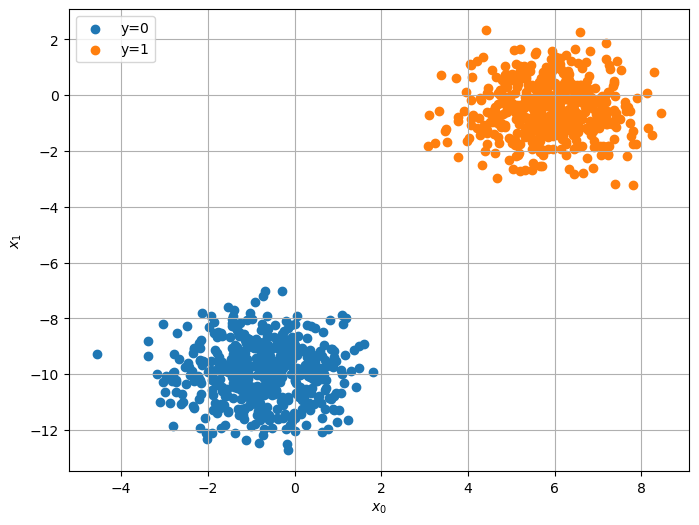

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='y=0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='y=1')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend()
plt.grid()

In [5]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)

SVC(kernel='linear')

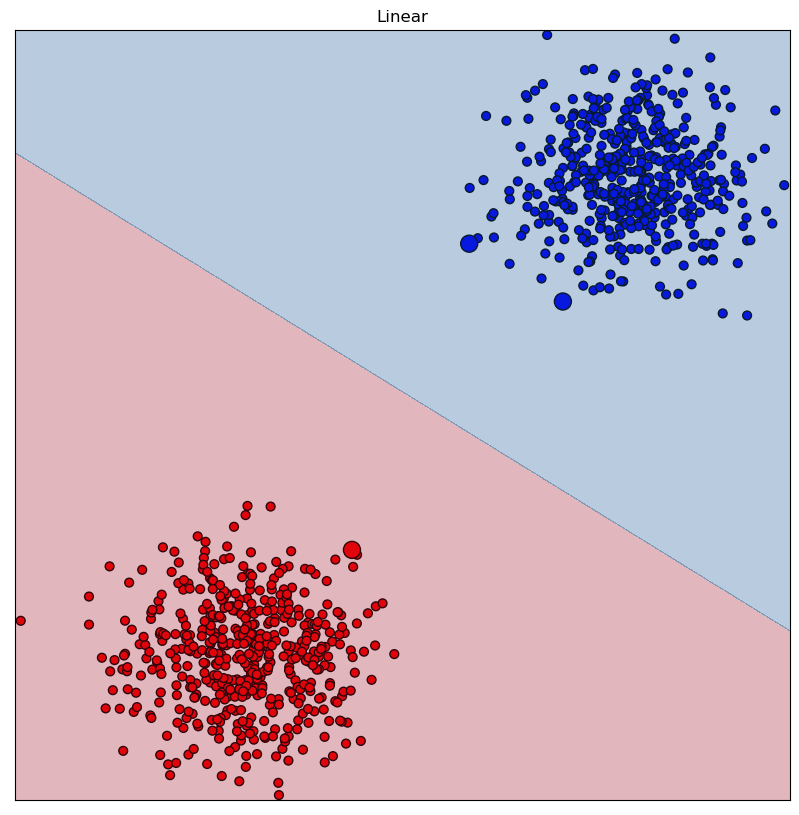

In [10]:
plot_separating_surface(X, y, linear_svm, view_support=True, title='Linear')

In [7]:
linear_svm.coef_, linear_svm.coef0

(array([[0.19141381, 0.26676792]]), 0.0)

In [9]:
linear_svm.support_

array([408, 338, 470])

In [11]:
linear_svm.support_vectors_

array([[ 1.08776767, -7.87064649],
       [ 3.08501511, -1.80663187],
       [ 4.6804614 , -2.95135612]])

In [12]:
X_support = X[linear_svm.support_]
y_support = y[linear_svm.support_]

In [13]:
linear_svm_support = SVC(kernel='linear')

In [14]:
linear_svm_support.fit(X_support, y_support)

SVC(kernel='linear')

In [15]:
linear_svm_support.coef_

array([[0.19140242, 0.26677624]])

In [22]:
X, y = make_moons(n_samples=1000, noise=0.1)

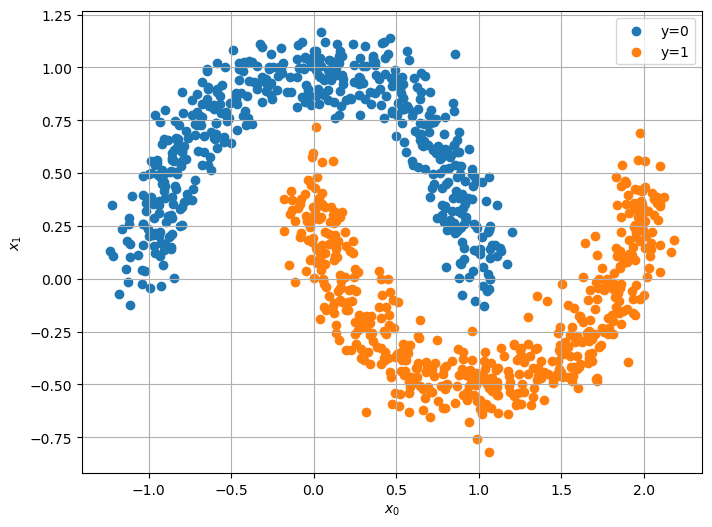

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='y=0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='y=1')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend()
plt.grid()

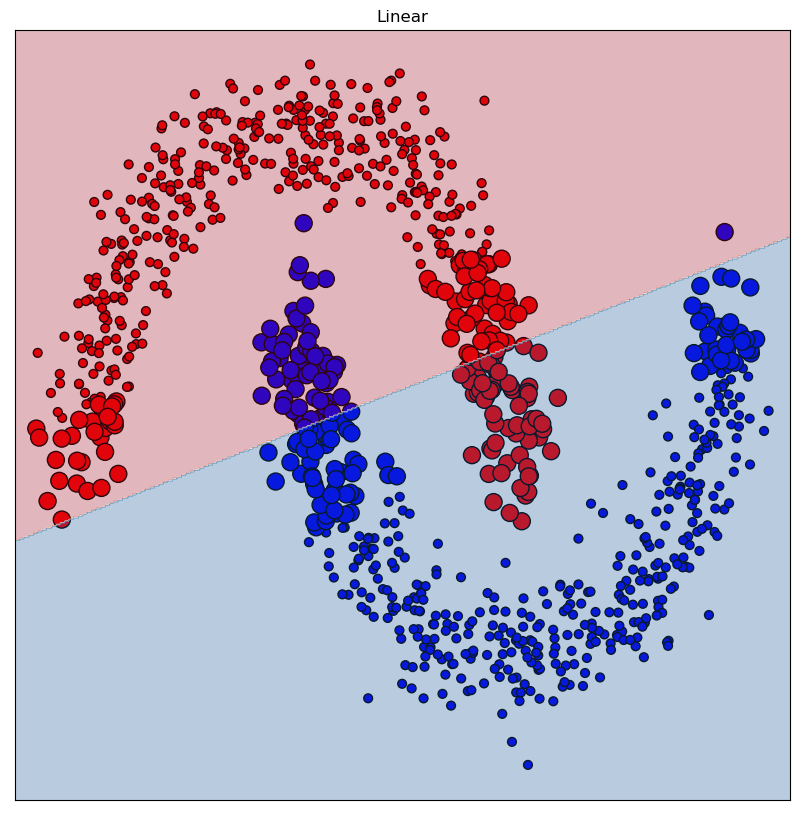

In [27]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)
plot_separating_surface(X, y, linear_svm, view_support=True, title='Linear')

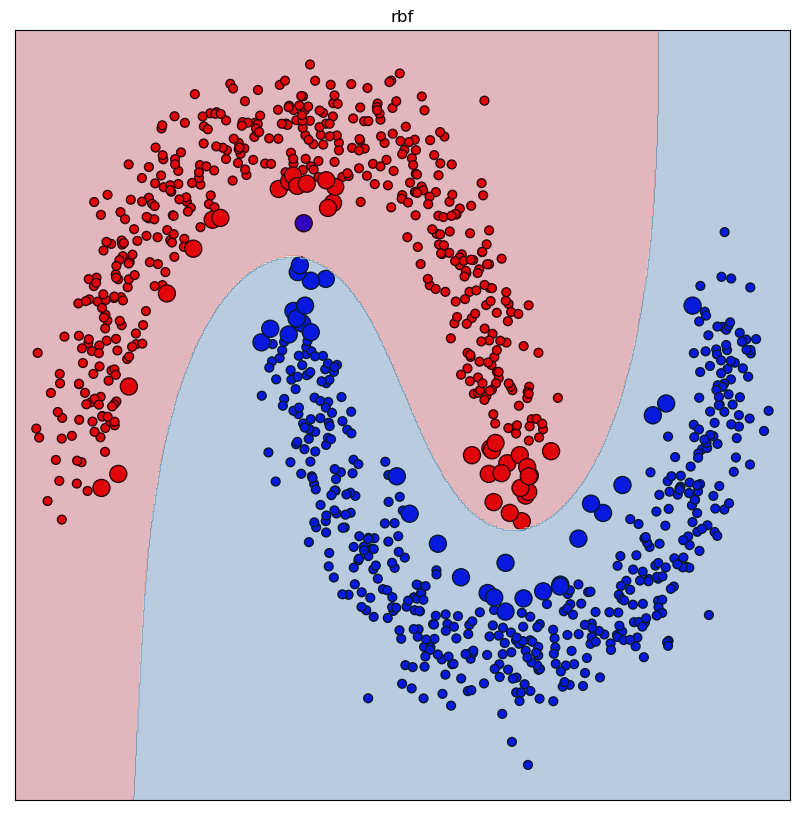

In [28]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X, y)
plot_separating_surface(X, y, rbf_svm, view_support=True, title='rbf')

In [31]:
X, y = make_circles(n_samples=1000, noise=0.05)

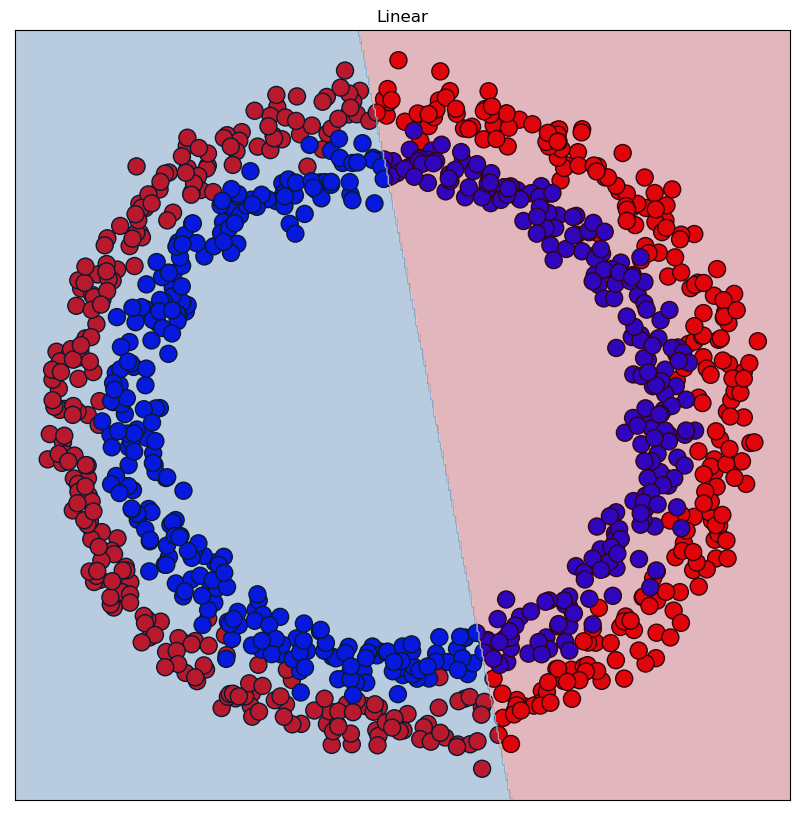

In [32]:
linear_svm = SVC(kernel='linear')
linear_svm.fit(X, y)
plot_separating_surface(X, y, linear_svm, view_support=True, title='Linear')

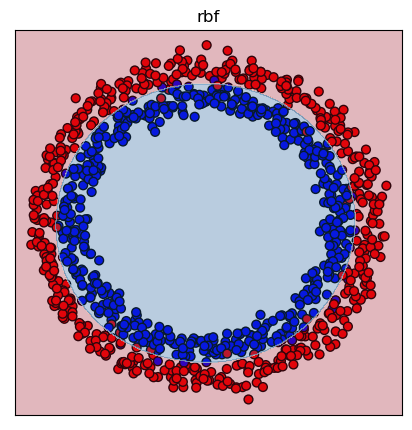

In [36]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X, y)
plot_separating_surface(X, y, rbf_svm, view_support=False, title='rbf')